# Exploratory - Bike Accidents

Jose Masache Cevallos

## 1. Data Analysis

Upload the packages that have been useful for this report:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'darkgrid');

Read the csv files of the currently year and the two last:

In [2]:
df = pd.read_csv('C:/Users/josed/OneDrive/Documentos/IMMUNE/Data Science/Exploratory/Blog/AccidentesBicicletas_2019.csv', \
    sep = ';', encoding = 'ISO-8859-1')

df2 = pd.read_csv('C:/Users/josed/OneDrive/Documentos/IMMUNE/Data Science/Exploratory/Blog/AccidentesBicicletas_2020.csv', \
    sep = ';', encoding = 'ISO-8859-1')

df3 = pd.read_csv('C:/Users/josed/OneDrive/Documentos/IMMUNE/Data Science/Exploratory/Blog/AccidentesBicicletas_2021.csv', \
    sep = ';')

In [347]:
df3.keys()

Index(['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*'],
      dtype='object')

See the shape of the files:

In [285]:
print('Dataset from 2019 with ' +  str(df.shape) + ' rows and columns respectively')
print('Dataset from 2020 with ' +  str(df2.shape) + ' rows and columns respectively')
print('Dataset from 2021 with ' +  str(df3.shape) + ' rows and columns respectively')

Dataset from 2019 with (891, 13) rows and columns respectively
Dataset from 2020 with (921, 13) rows and columns respectively
Dataset from 2021 with (261, 13) rows and columns respectively


In [ ]:
The shape of the three datasets are similar. Now, we can check the names of the columns in order join them in a single dataset:

In [109]:
#Check the keys of the three datasets

print('- df from 2019: ', '\n', df.keys(), '\n')
print('- df from 2020: ', '\n', df2.keys(), '\n')
print('- df from 2021: ', '\n', df3.keys(), '\n')

- df from 2019:  
 Index(['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO EDAD', 'SEXO', 'LESIVIDAD*'],
      dtype='object') 

- df from 2020:  
 Index(['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*'],
      dtype='object') 

- df from 2021:  
 Index(['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO',
       'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO',
       'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*'],
      dtype='object') 



The dataset from 2019 contains one column ('RANGO EDAD') where the name of this column is different if it is compared with the other two datasets. Thus, the name of this column has been changed:

In [3]:
df = df.rename(columns = {'RANGO EDAD': 'RANGO DE EDAD'})

Now, the join of the three datasets has been achieved:

In [4]:
frames = [df, df2, df3]
data = pd.concat(frames)

In [303]:
data.sample(5)

,Nº EXPEDIENTE,FECHA,HORA,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO DE EDAD,SEXO,LESIVIDAD*
564,2019S029285,31/08/2019,21:50,CALL. RAMON GOMEZ DE LA SERNA,9A,FUENCARRAL-EL PARDO,Colisión fronto-lateral,Despejado,Bicicleta,Conductor,DE 18 A 20 AÑOS,Hombre,7.0
165,2021S004752,25/03/2021,19:00,IDB. PARQUE LINEAL DEL MANZANARES,0,PUENTE DE VALLECAS,Caída,Despejado,Bicicleta,Conductor,DE 18 A 20 AÑOS,Hombre,1.0
90,2019S012142,20/02/2019,7:45,CALL. ATOCHA,104,CENTRO,Caída,Despejado,Bicicleta,Conductor,DE 15 A 17 AÑOS,Mujer,7.0
275,2020S007754,03/06/2020,1:05,PASEO. YESERIAS / GTA. PIRAMIDES,-,ARGANZUELA,Caída,Despejado,Bicicleta,Conductor,DE 35 A 39 AÑOS,Hombre,1.0
250,2020S007563,30/05/2020,9:32,CTRA. ESTACION DE HORTALEZA,56,HORTALEZA,Caída,Despejado,Bicicleta,Conductor,DE 50 A 54 AÑOS,Hombre,1.0


The details of the dataset are shown below:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 260
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nº  EXPEDIENTE        2073 non-null   object 
 1   FECHA                 2073 non-null   object 
 2   HORA                  2073 non-null   object 
 3   CALLE                 2073 non-null   object 
 4   NÚMERO                2073 non-null   object 
 5   DISTRITO              2073 non-null   object 
 6   TIPO ACCIDENTE        2073 non-null   object 
 7   ESTADO METEREOLÓGICO  2016 non-null   object 
 8   TIPO VEHÍCULO         2073 non-null   object 
 9   TIPO PERSONA          2073 non-null   object 
 10  RANGO DE EDAD         2073 non-null   object 
 11  SEXO                  2036 non-null   object 
 12  LESIVIDAD*            1829 non-null   float64
dtypes: float64(1), object(12)
memory usage: 226.7+ KB


At the moment, there are 12 columns of object type and one column of float type. Also, there are some empty values. Thus, in order to analize all the cases that have complete values for all the columns, NaNs has been removed:

In [6]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 0 to 260
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nº  EXPEDIENTE        1821 non-null   object 
 1   FECHA                 1821 non-null   object 
 2   HORA                  1821 non-null   object 
 3   CALLE                 1821 non-null   object 
 4   NÚMERO                1821 non-null   object 
 5   DISTRITO              1821 non-null   object 
 6   TIPO ACCIDENTE        1821 non-null   object 
 7   ESTADO METEREOLÓGICO  1821 non-null   object 
 8   TIPO VEHÍCULO         1821 non-null   object 
 9   TIPO PERSONA          1821 non-null   object 
 10  RANGO DE EDAD         1821 non-null   object 
 11  SEXO                  1821 non-null   object 
 12  LESIVIDAD*            1821 non-null   float64
dtypes: float64(1), object(12)
memory usage: 199.2+ KB


The empty values have been removed. The next step has been change the column names:

In [7]:
data = data.rename(columns = {'Nº  EXPEDIENTE' : 'expediente', 'FECHA' : 'fecha', 'HORA' : 'hora', 'CALLE' : 'calle', \
    'NÚMERO' : 'numero', 'DISTRITO' : 'distrito', 'TIPO ACCIDENTE' : 'accidente', 'ESTADO METEREOLÓGICO' : 'clima', \
        'TIPO VEHÍCULO' : 'vehiculo', 'TIPO PERSONA' : 'persona', 'RANGO DE EDAD' : 'rango_edad', \
            'SEXO' : 'sexo', 'LESIVIDAD*' : 'lesividad'})


For this analysis, the columns 'calle', 'expediente', and 'numero' have not been used. Thus, both of them have been deleted.

In [8]:
data = data.drop(['expediente', 'hora', 'calle', 'numero'], axis = 1)

In [362]:
data.head(3)

,fecha,distrito,accidente,clima,vehiculo,persona,rango_edad,sexo,lesividad
0,01/01/2019,SALAMANCA,Alcance,Despejado,Bicicleta,Conductor,DE 25 A 29 AÑOS,Hombre,1.0
1,02/01/2019,HORTALEZA,Colisión fronto-lateral,Despejado,Bicicleta,Conductor,DE 70 A 74 AÑOS,Hombre,3.0
2,03/01/2019,VILLA DE VALLECAS,Alcance,Se desconoce,Bicicleta,Conductor,DE 15 A 17 AÑOS,Hombre,7.0


Now, the type of the column 'fecha' has been changed from object to datetime:

In [9]:
data['fecha'] = pd.to_datetime(data['fecha'], dayfirst = True)


The year and month have been kept in new variables. Also, the column 'fecha' has been deleted:

In [10]:
data['year'] = pd.DatetimeIndex(data['fecha']).year
data['month'] = pd.DatetimeIndex(data['fecha']).month
data.drop(['fecha'], axis = 1, inplace = True)

The dataset has been sort by year and month:

In [11]:
data.sort_values(['year', 'month'], inplace = True)

Finally, the information of the dataset after some steps is shown below:

In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 0 to 260
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distrito    1821 non-null   object 
 1   accidente   1821 non-null   object 
 2   clima       1821 non-null   object 
 3   vehiculo    1821 non-null   object 
 4   persona     1821 non-null   object 
 5   rango_edad  1821 non-null   object 
 6   sexo        1821 non-null   object 
 7   lesividad   1821 non-null   float64
 8   year        1821 non-null   int64  
 9   month       1821 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 156.5+ KB


Also, a sample of the final dataset to be used:

In [377]:
data.sample()

,distrito,accidente,clima,vehiculo,persona,rango_edad,sexo,lesividad,year,month
109,CHAMBERÍ,Caída,Despejado,Bicicleta EPAC (pedaleo asistido),Conductor,DE 21 A 24 AÑOS,Hombre,2.0,2021,3
422,FUENCARRAL-EL PARDO,Caída,Despejado,Bicicleta,Conductor,DE 40 A 44 AÑOS,Hombre,6.0,2019,7
186,MONCLOA-ARAVACA,Caída,Despejado,Bicicleta,Conductor,DE 35 A 39 AÑOS,Hombre,7.0,2020,5
156,CENTRO,Colisión lateral,Despejado,Bicicleta,Conductor,DE 25 A 29 AÑOS,Hombre,7.0,2021,3
727,USERA,Colisión lateral,Se desconoce,Bicicleta,Conductor,DE 35 A 39 AÑOS,Mujer,2.0,2020,10


## 2. Data Visualization 

In this report, some visualizations have been achieved in order to see the district, gender, type of accident, among others. The plots are shown below:

Text(0, 0.5, 'Distrito')

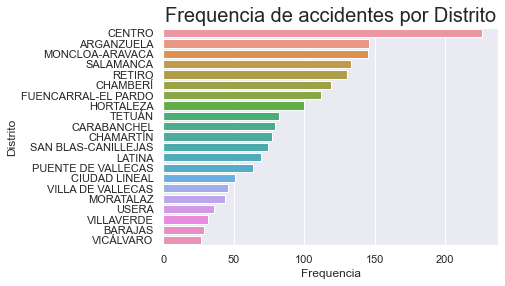

In [12]:
ax = sns.countplot(y = 'distrito', data = data, order = data['distrito'].value_counts().index)
ax.set_title('Frequencia de accidentes por Distrito', fontsize = 20)
ax.set_xlabel('Frequencia')
ax.set_ylabel('Distrito')

The accidents most frequent occur in the center of the town, followed by Arganzuela, Moncloa - Aravaca, Salamanda, and Retiro.

Another feature that we can analize is the accidents by gender:

Text(0, 0.5, 'Género')

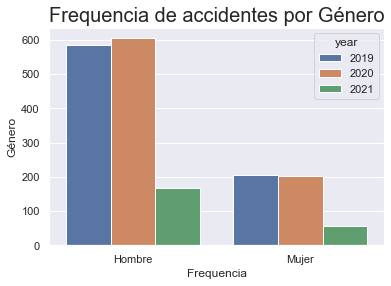

In [395]:
ax = sns.countplot(x = 'sexo', data = data, hue = 'year')
ax.set_title('Frequencia de accidentes por Género', fontsize = 20)
ax.set_xlabel('Frequencia')
ax.set_ylabel('Género')

The plot of above says us that Males have more accidents than Females for al the years that we have analyzed. The difference between genders is very marked.

Following this analysis, another interesting feature to visualize is the frequency of accidents by month and year. The plot say us that the most frequent month has been June. The month with the lowest frequency has been January. On 2021, March and April have had more accidents if we compare with the previous years. 

Text(0, 0.5, 'Mes')

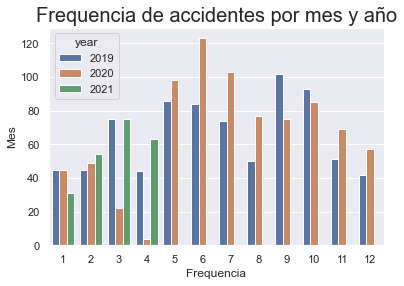

In [396]:
ax = sns.countplot(x = 'month', data = data, hue = 'year')
ax.set_title('Frequencia de accidentes por mes y año', fontsize = 20)
ax.set_xlabel('Frequencia')
ax.set_ylabel('Mes')

The most frequent type of accident has been bike falls:

Text(0, 0.5, 'Tipo de accidente')

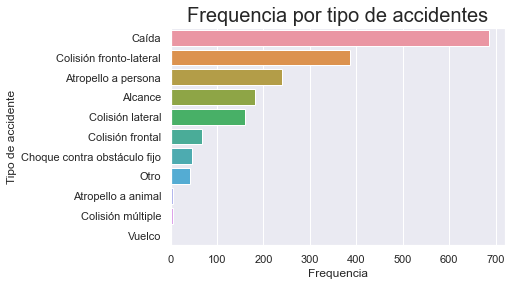

In [397]:
ax = sns.countplot(y = 'accidente', data = data, order = data['accidente'].value_counts().index)
ax.set_title('Frequencia por tipo de accidentes', fontsize = 20)
ax.set_xlabel('Frequencia')
ax.set_ylabel('Tipo de accidente')

The most frequent age range has been between 25 and 39 years old:

Text(0, 0.5, 'Rango de edad')

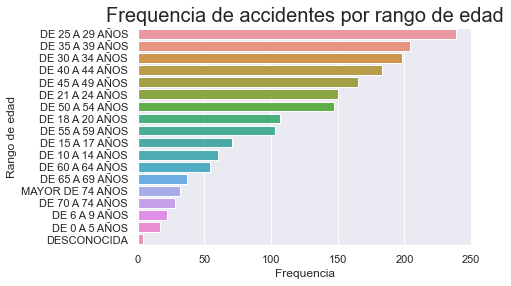

In [398]:
ax = sns.countplot(y = 'rango_edad', data = data, order = data['rango_edad'].value_counts().index)
ax.set_title('Frequencia de accidentes por rango de edad', fontsize = 20)
ax.set_xlabel('Frequencia')
ax.set_ylabel('Rango de edad')

Finally, the harmfulness most frequent has been the value of seven where it means 'Healthcare only at the scene of the accident - LEVE'

Text(0, 0.5, 'Lesividad')

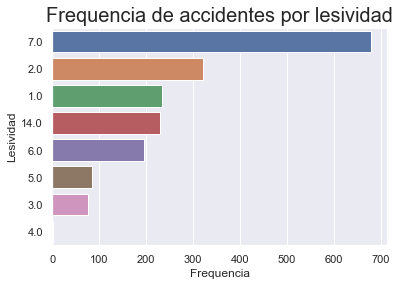

In [399]:
ax = sns.countplot(y = 'lesividad', data = data, order = data['lesividad'].value_counts().index)
ax.set_title('Frequencia de accidentes por lesividad', fontsize = 20)
ax.set_xlabel('Frequencia')
ax.set_ylabel('Lesividad')